# EDA Payments

In [1]:
import pandas as pd

# Imported the data
df_payments = pd.read_csv('../data/created_data/payments.csv')
display(df_payments.head())

C:\Users\zeynep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_low,last_fico_range_high
0,68407277,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,560.0,564.0
1,68355089,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,695.0,699.0
2,68341763,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,700.0,704.0
3,66310712,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,Mar-2019,675.0,679.0
4,68476807,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,NaN,Mar-2018,700.0,704.0


In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
print(df_payments.columns.tolist())

['id', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_low', 'last_fico_range_high']


In [3]:
df_payments.shape

(2260701, 16)

In [4]:
# id is pk ?
is_id_unique = df_payments['id'].is_unique
print(f"Is the 'id' column in df_payments unique? {is_id_unique}")

Is the 'id' column in df_payments unique? True


In [5]:
null_ids = df_payments['id'].isnull().sum()
print(f"Number of null values in 'id' column: {null_ids}")

Number of null values in 'id' column: 0


In [6]:
df_payments['id'].shape[0]

2260701

In [7]:
# Number of null values per column
display(df_payments.isnull().sum())

id                               0
out_prncp                       33
out_prncp_inv                   33
total_pymnt                     33
total_pymnt_inv                 33
total_rec_prncp                 33
total_rec_int                   33
total_rec_late_fee              33
recoveries                      33
collection_recovery_fee         33
last_pymnt_d                  2460
last_pymnt_amnt                 33
next_pymnt_d               1345343
last_credit_pull_d             105
last_fico_range_low             33
last_fico_range_high            33
dtype: int64

In [8]:
# Percentage of null values per column
null_percentage = (df_payments.isnull().sum() / len(df_payments)) * 100
formatted_null_percentage = null_percentage.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")
display(formatted_null_percentage)

next_pymnt_d               59.51%
last_pymnt_d                0.11%
last_credit_pull_d          0.00%
out_prncp                   0.00%
out_prncp_inv               0.00%
total_pymnt                 0.00%
total_pymnt_inv             0.00%
total_rec_prncp             0.00%
total_rec_int               0.00%
total_rec_late_fee          0.00%
recoveries                  0.00%
collection_recovery_fee     0.00%
last_pymnt_amnt             0.00%
last_fico_range_low         0.00%
last_fico_range_high        0.00%
id                          0.00%
dtype: object

In [9]:
display(df_payments.describe().round(2))

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_low,last_fico_range_high
count,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00
mean,4206.89,4205.97,12082.56,12064.39,9505.77,2431.39,1.52,143.88,23.98,3429.35,675.54,687.66
std,7343.24,7342.33,9901.38,9896.99,8321.85,2679.74,11.84,748.16,131.23,6018.25,111.10,72.97
min,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,4546.46,4531.80,3000.00,728.19,0.00,0.00,0.00,310.33,650.00,654.00
50%,0.00,0.00,9329.72,9309.67,7000.00,1525.94,0.00,0.00,0.00,600.57,695.00,699.00
75%,6149.94,6146.31,16940.87,16916.71,13899.10,3108.06,0.00,0.00,0.00,3743.75,730.00,734.00
max,40000.00,40000.00,63296.88,63296.88,40000.00,28192.50,1484.34,39859.55,7174.72,42192.05,845.00,850.00


In [10]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       object 
 1   out_prncp                float64
 2   out_prncp_inv            float64
 3   total_pymnt              float64
 4   total_pymnt_inv          float64
 5   total_rec_prncp          float64
 6   total_rec_int            float64
 7   total_rec_late_fee       float64
 8   recoveries               float64
 9   collection_recovery_fee  float64
 10  last_pymnt_d             object 
 11  last_pymnt_amnt          float64
 12  next_pymnt_d             object 
 13  last_credit_pull_d       object 
 14  last_fico_range_low      float64
 15  last_fico_range_high     float64
dtypes: float64(12), object(4)
memory usage: 276.0+ MB


In [11]:
# Converted the last_pymnt_d column from object to datetime format.
df_payments['last_pymnt_d'] = pd.to_datetime(df_payments['last_pymnt_d'], format='%b-%Y', errors='coerce')
display(df_payments['last_pymnt_d'].head())

0   2019-01-01
1   2016-06-01
2   2017-06-01
3   2019-02-01
4   2016-07-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [12]:
# Converted the next_pymnt_d column from object to datetime format.
df_payments['next_pymnt_d'] = pd.to_datetime(df_payments['next_pymnt_d'], format='%b-%Y', errors='coerce')
display(df_payments['next_pymnt_d'].head())

0          NaT
1          NaT
2          NaT
3   2019-04-01
4          NaT
Name: next_pymnt_d, dtype: datetime64[ns]

In [13]:
# Converted the last_credit_pull_d column from object to datetime format.
df_payments['last_credit_pull_d'] = pd.to_datetime(df_payments['last_credit_pull_d'], format='%b-%Y', errors='coerce')
display(df_payments['last_credit_pull_d'].head())

0   2019-03-01
1   2019-03-01
2   2019-03-01
3   2019-03-01
4   2018-03-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [14]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       object        
 1   out_prncp                float64       
 2   out_prncp_inv            float64       
 3   total_pymnt              float64       
 4   total_pymnt_inv          float64       
 5   total_rec_prncp          float64       
 6   total_rec_int            float64       
 7   total_rec_late_fee       float64       
 8   recoveries               float64       
 9   collection_recovery_fee  float64       
 10  last_pymnt_d             datetime64[ns]
 11  last_pymnt_amnt          float64       
 12  next_pymnt_d             datetime64[ns]
 13  last_credit_pull_d       datetime64[ns]
 14  last_fico_range_low      float64       
 15  last_fico_range_high     float64       
dtypes: datetime64[ns](3), float64(12), object(1)
memory usage: 276.0+ MB


### Aykiri Deger Tespiti (Outlier) 

In [15]:
# 1. Identified numerical columns
numerical_df = df_payments.select_dtypes(include=['number'])
display(numerical_df.head())
display(numerical_df.columns)
numerical_df.shape

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_low,last_fico_range_high
0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,560.0,564.0
1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,695.0,699.0
2,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,700.0,704.0
3,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,675.0,679.0
4,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,700.0,704.0


Index(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_low',
       'last_fico_range_high'],
      dtype='object')

(2260701, 12)

In [16]:
# 2. Detected outliers using the IQR method
outlier_counts = {}

for column in numerical_df.columns:
    Q1 = numerical_df[column].quantile(0.25)
    Q3 = numerical_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numerical_df[(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)][column]
    outlier_counts[column] = len(outliers)

print("Number of outliers per numerical column (IQR method):")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Number of outliers per numerical column (IQR method):
out_prncp: 212242
out_prncp_inv: 212305
total_pymnt: 83848
total_pymnt_inv: 84034
total_rec_prncp: 64014
total_rec_int: 163420
total_rec_late_fee: 87155
recoveries: 185432
collection_recovery_fee: 177013
last_pymnt_amnt: 313415
last_fico_range_low: 98414
last_fico_range_high: 98414


In [17]:
# Percentage of outliers per column
outlier_percentages = {}
for column, count in outlier_counts.items():
    if len(numerical_df) > 0:
        percentage = (count / len(numerical_df)) * 100
        outlier_percentages[column] = f"{percentage:.2f}%"
    else:
        outlier_percentages[column] = "0.00%" # Handle empty DataFrame case

print("Percentage of outliers per numerical column (IQR method):")
for column, percentage_str in outlier_percentages.items():
    print(f"{column}: {percentage_str}")

Percentage of outliers per numerical column (IQR method):
out_prncp: 9.39%
out_prncp_inv: 9.39%
total_pymnt: 3.71%
total_pymnt_inv: 3.72%
total_rec_prncp: 2.83%
total_rec_int: 7.23%
total_rec_late_fee: 3.86%
recoveries: 8.20%
collection_recovery_fee: 7.83%
last_pymnt_amnt: 13.86%
last_fico_range_low: 4.35%
last_fico_range_high: 4.35%


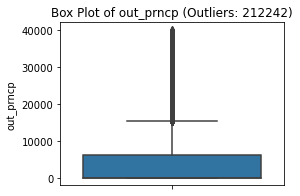

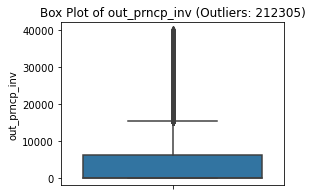

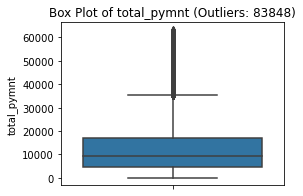

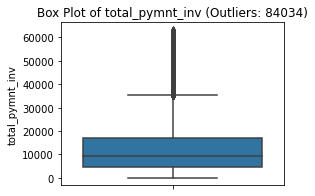

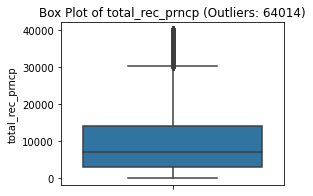

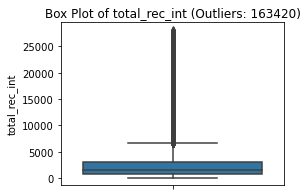

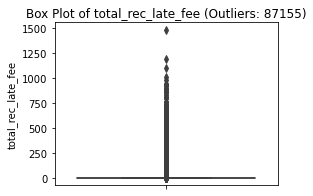

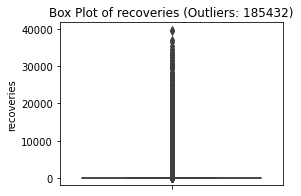

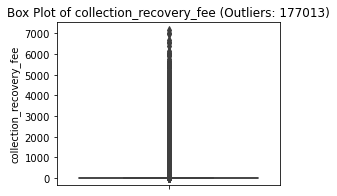

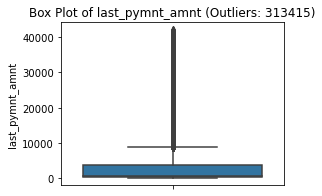

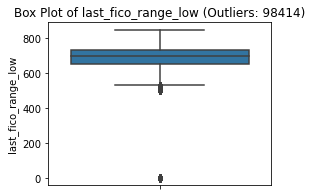

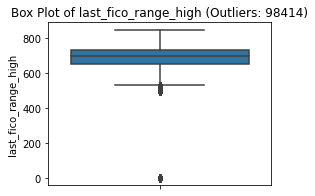

In [18]:
# Visualized the outliers.
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_df.columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=numerical_df[column])
    plt.title(f'Box Plot of {column} (Outliers: {outlier_counts.get(column, 0)})')
    plt.ylabel(column)
    plt.show()
    plt.close()

In [19]:
# Identified the non-numeric columns
categorical_df = df_payments.select_dtypes(exclude=['number'])
display(categorical_df.head())
display(categorical_df.columns)

,id,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,68407277,2019-01-01,NaT,2019-03-01
1,68355089,2016-06-01,NaT,2019-03-01
2,68341763,2017-06-01,NaT,2019-03-01
3,66310712,2019-02-01,2019-04-01,2019-03-01
4,68476807,2016-07-01,NaT,2018-03-01


Index(['id', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], dtype='object')

In [20]:
df_payments['next_pymnt_d'].isna().sum()

1345343

In [21]:
nat_percentage = df_payments['next_pymnt_d'].isna().mean() * 100
print(nat_percentage.round(2))

59.51


In [23]:
#df_payments.to_csv('payments_cleaned.csv', index=False)